Predict Bike Sharing Demand with AutoGluon Template
Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit ? markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

File-> Export Notebook As... -> Export Notebook as HTML

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

Step 1: Create an account with Kaggle
Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

In [1]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

  Using cached setuptools-69.5.1-py3-none-any.whl.metadata (6.2 kB)
Using cached setuptools-69.5.1-py3-none-any.whl (894 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 60.2.0
    Uninstalling setuptools-60.2.0:
      Successfully uninstalled setuptools-60.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
openxlab 0.0.38 requires setuptools~=60.2.0, but you have setuptools 69.5.1 which is incompatible.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.1/953.1 kB 5.6 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 69.5.1
    Uninstalling setuptools-69.5.1:
      Successfully uninstalled setuptools-69.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
cvxpy 1.3.4 requires setuptools>65.5.1, but you have setuptools 60.2.0 which is incompatible.


In [2]:
!pip install kaggle


In [7]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import shutil

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Source path on Google Drive for the new token file
new_token_source_path = "/content/drive/My Drive/Colab_Notebooks/kaggle.json"

# Destination path in Colab
destination_path = "/root/.kaggle/kaggle.json"

# Copy file from Google Drive to Colab
shutil.copyfile(new_token_source_path, destination_path)

# Set permissions for the API key file
!chmod 600 /root/.kaggle/kaggle.json



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0% 0.00/189k [00:00<?, ?B/s]
100% 189k/189k [00:00<00:00, 81.0MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [12]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [13]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("/content/train.csv", parse_dates=["datetime"])
train.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [14]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe().round(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00
mean,2011-12-27 05:56:22.399411968,2.51,0.03,0.68,1.42,20.23,23.66,61.89,12.80,36.02,155.55,191.57
min,2011-01-01 00:00:00,1.00,0.00,0.00,1.00,0.82,0.76,0.00,0.00,0.00,0.00,1.00
25%,2011-07-02 07:15:00,2.00,0.00,0.00,1.00,13.94,16.66,47.00,7.00,4.00,36.00,42.00
50%,2012-01-01 20:30:00,3.00,0.00,1.00,1.00,20.50,24.24,62.00,13.00,17.00,118.00,145.00
75%,2012-07-01 12:45:00,4.00,0.00,1.00,2.00,26.24,31.06,77.00,17.00,49.00,222.00,284.00
max,2012-12-19 23:00:00,4.00,1.00,1.00,4.00,41.00,45.46,100.00,57.00,367.00,886.00,977.00
std,NaN,1.12,0.17,0.47,0.63,7.79,8.47,19.25,8.16,49.96,151.04,181.14


In [15]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("/content/test.csv", parse_dates=["datetime"])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [16]:
# Same thing as train and test dataset
submission = pd.read_csv("/content/sampleSubmission.csv")
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [17]:
predictor = TabularPredictor(label="count", eval_metric="root_mean_squared_error", learner_kwargs={'ignored_columns': ['casual','registered']}).fit(
    train_data=train,
    time_limit=600, presets="best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20240507_120143"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240507_120143/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 201 seconds

In [18]:
predictor.fit_summary()


*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.162518  root_mean_squared_error      22.332005  382.578058                0.002641           0.031687            3       True         11
1   RandomForestMSE_BAG_L2  -53.436160  root_mean_squared_error      17.464652  287.994489                0.665306          44.534663            2       True         10
2          LightGBM_BAG_L2  -55.132338  root_mean_squared_error      17.047825  274.516200                0.248479          31.056374            2       True          9
3        LightGBMXT_BAG_L2  -60.807852  root_mean_squared_error      21.415579  306.955334                4.616233          63.495508            2       True          8
4    KNeighborsDist_BAG_L1  -84.125061  root_mean_squared_error       0.066994    0.050523   

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.54835939455667,
  'CatBoost_BAG_L1': -131.0074821587801,
  'WeightedEnsemble_L2': -84.12506123181602,
  'LightGBMXT_BAG_L2': -60.8078516892529,
  'LightGBM_BAG_L2': -55.13233785

In [19]:
predictions = predictor.predict(test)
predictions.head()

0    23.889370
1    42.591141
2    45.766609
3    48.863304
4    51.801796
Name: count, dtype: float32

In [20]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe().round(2)

count    6493.00
mean      100.37
std        89.67
min         3.33
25%        19.85
50%        63.34
75%       168.39
max       365.92
Name: count, dtype: float64

In [21]:
# How many negative values do we have?
negative_count = (predictions < 0).sum()
print(f"Number of negative values: {negative_count}")

Number of negative values: 0


In [22]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [23]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:01<00:00, 162kB/s]
Successfully submitted to Bike Sharing Demand

In [24]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName        date                 description           status    publicScore  privateScore  
--------------  -------------------  --------------------  --------  -----------  ------------  
submission.csv  2024-05-07 12:13:38  first raw submission  pending                              
submission.csv  2024-05-07 06:36:31  first raw submission  complete  1.80547      1.80547       


Initial score of 1.80547


array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>],
       [<Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weather'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>]], dtype=object)

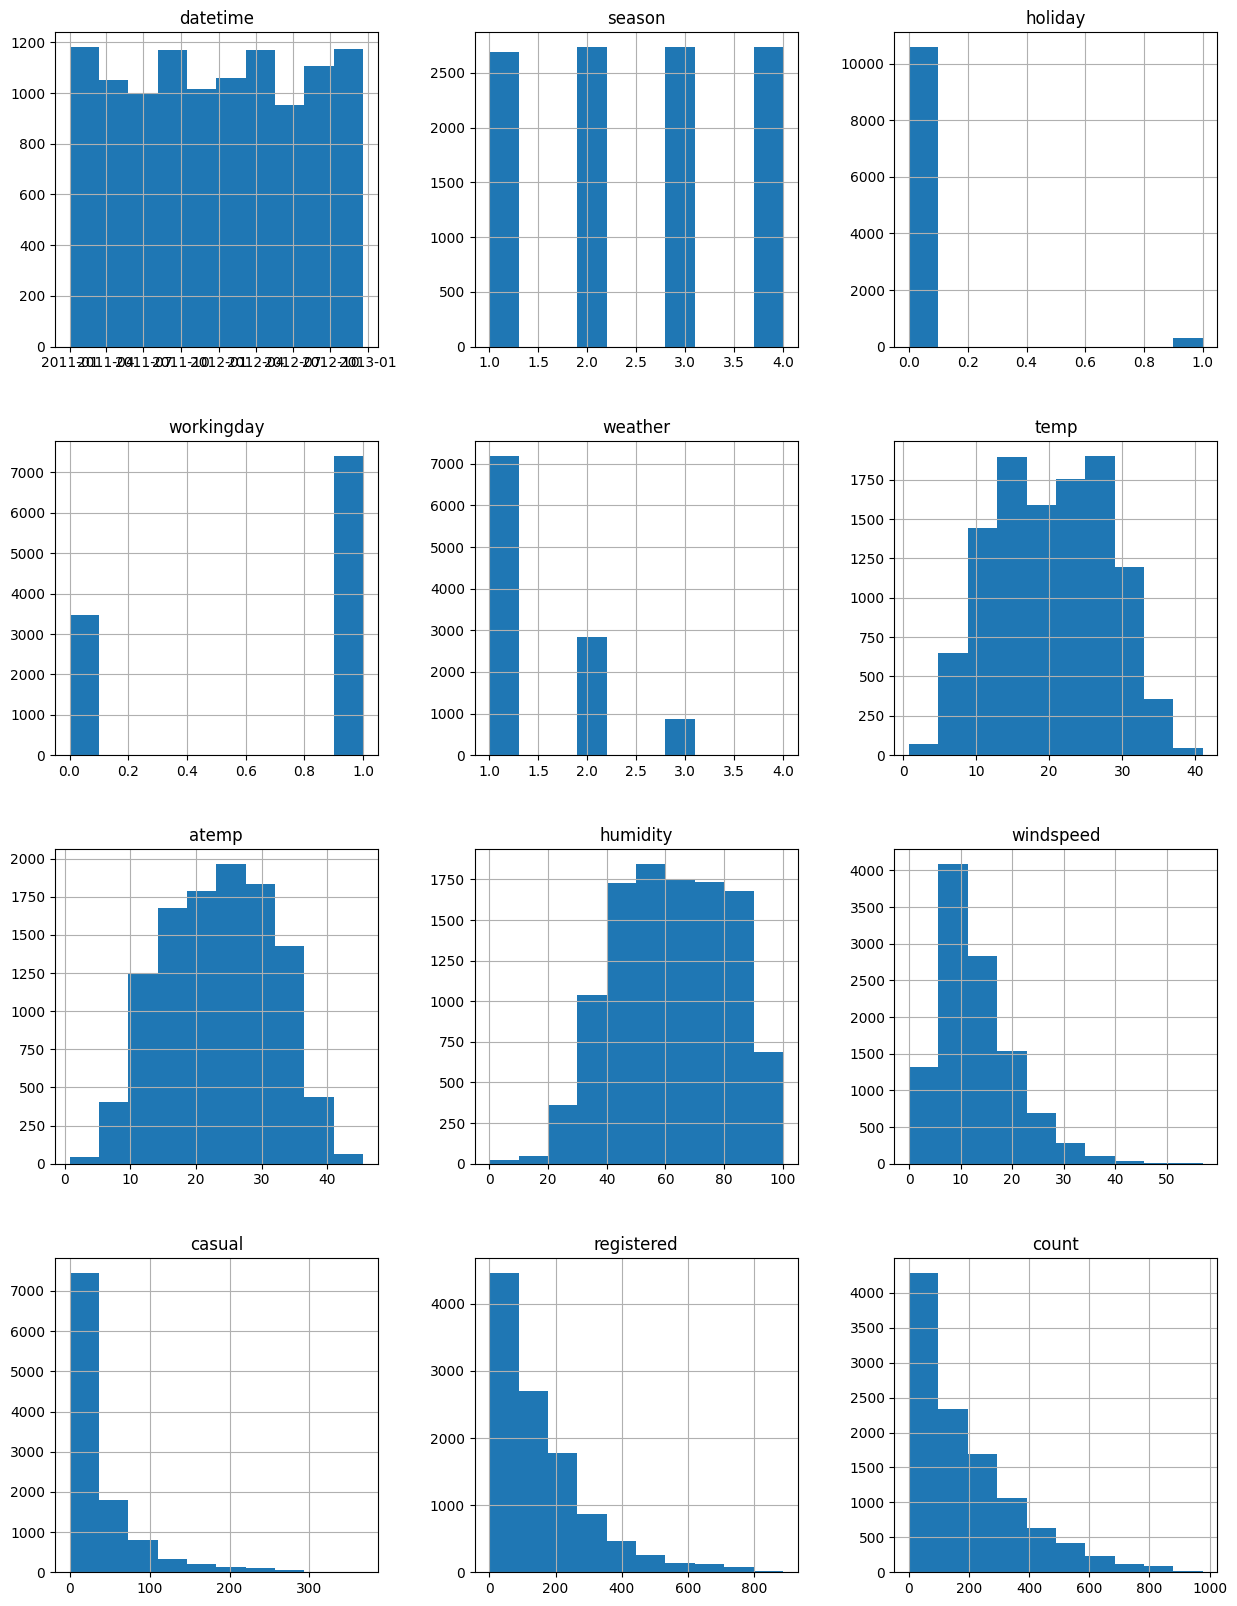

In [25]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize=(15, 20))

In [26]:
# create a new feature
train["hour"] = train["datetime"].dt.hour
test["hour"] = test["datetime"].dt.hour
train["dayofweek"] = train["datetime"].dt.dayofweek
test["dayofweek"] = test["datetime"].dt.dayofweek

In [27]:
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [28]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,5


array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>],
       [<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>],
       [<Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>],
       [<Axes: title={'center': 'count'}>,
        <Axes: title={'center': 'hour'}>,
        <Axes: title={'center': 'dayofweek'}>]], dtype=object)

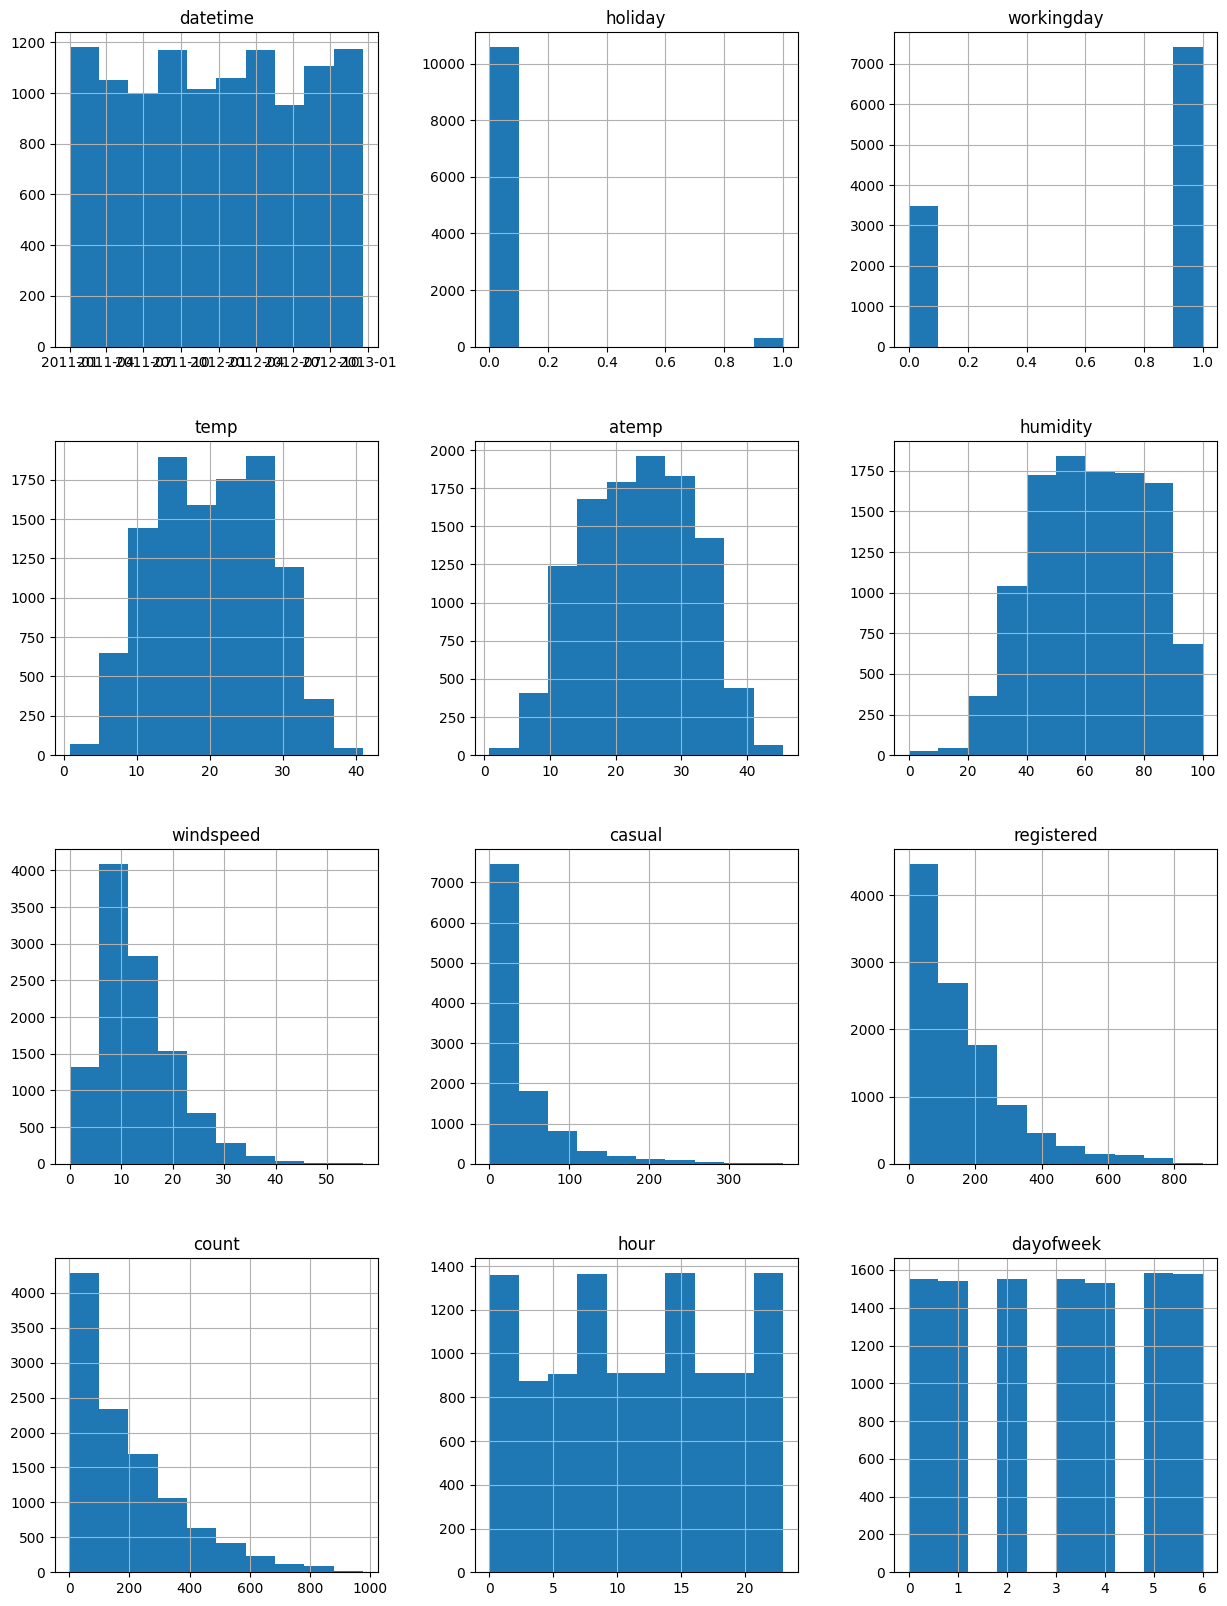

In [29]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(15, 20))

In [30]:
predictor_new_features = TabularPredictor(label="count", eval_metric="root_mean_squared_error", learner_kwargs={'ignored_columns': ['casual','registered']}).fit(
    train_data=train,
    time_limit=600,
    presets="best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20240507_121410"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240507_121410/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 193 seconds

In [31]:
predictor_new_features.fit_summary()


*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.481044  root_mean_squared_error      36.350847  387.126264                0.004282           0.046818            3       True         11
1          LightGBM_BAG_L2  -30.746940  root_mean_squared_error      33.968658  298.497335                0.379593          32.291759            2       True          9
2        LightGBMXT_BAG_L2  -31.180793  root_mean_squared_error      35.167656  305.750278                1.578591          39.544702            2       True          8
3   RandomForestMSE_BAG_L2  -31.948835  root_mean_squared_error      34.388382  315.242986                0.799317          49.037410            2       True         10
4      WeightedEnsemble_L2  -32.351679  root_mean_squared_error      33.368486  213.611407   

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -34.51969073256383,
  'LightGBM_BAG_L1': -33.919639163586254,
  'RandomForestMSE_BAG_L1': -38.39829569179141,
  'CatBoost_BAG_L1': -39.04830047783404,
  'WeightedEnsemble_L2': -32.351679225126645,
  'LightGBMXT_BAG_L2': -31.18079269794384,
  'LightGBM_BAG_L2': -30.746939

In [32]:
# Remember to set all negative values to zero
submission["count"] = submission["count"].apply(lambda x: 0 if x < 0 else x)

In [33]:
# Same submitting predictions
submission_new_features = pd.read_csv('submission.csv')
submission_new_features["count"] = predictor_new_features.predict(test)
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [34]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"


100% 188k/188k [00:01<00:00, 163kB/s]
Successfully submitted to Bike Sharing Demand

In [35]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6


fileName                     date                 description           status    publicScore  privateScore  
---------------------------  -------------------  --------------------  --------  -----------  ------------  
submission_new_features.csv  2024-05-07 12:26:12  new features          complete  0.6096       0.6096        
submission.csv               2024-05-07 12:13:38  first raw submission  complete  1.80334      1.80334       
submission.csv               2024-05-07 06:36:31  first raw submission  complete  1.80547      1.80547       


In [36]:
from autogluon.common import space

# Neural network (NN) options

nn_options = {  # specifies non-default hyperparameter values for neural network models
    'num_epochs': 10,  # number of training epochs (controls training time of NN models)
    'learning_rate': space.Real(1e-4, 1e-2, default=5e-4, log=True),  # learning rate used in training (real-valued hyperparameter searched on log-scale)
    'activation': space.Categorical('relu', 'softrelu', 'tanh'),  # activation function used in NN (categorical hyperparameter, default = first entry)
    'dropout_prob': space.Real(0.0, 0.5, default=0.1),  # dropout probability (real-valued hyperparameter)
    'optimizer': space.Categorical("adam", "sgd", "rmsprop"),
}

# LightGBM (GBM) options
gbm_options = {
    'num_boost_round': 150,  # Number of boosting rounds
    'num_leaves': space.Int(lower=26, upper=66, default=36), # Number of leaves in trees
    'leraning_rate': 0.05,

}

hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'NN_TORCH': nn_options,
                  }

hyperparameter_tune_kwargs = {
    'num_trials': 10,
    'scheduler' : 'local',
    'searcher': 'auto',
}

predictor_new_hpo = TabularPredictor(label="count", eval_metric="root_mean_squared_error").fit(
    train_data=train.drop(["casual", "registered"], axis=1),
    time_limit=600,
    presets="best_quality",
    hyperparameters=hyperparameters,
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs
)

No path specified. Models will be saved in: "AutogluonModels/ag-20240507_122619"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240507_122619/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 67 seconds 

  0%|          | 0/10 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.08%)
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.07%)
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.10%)
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.07%)
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L1/T1 ...
	-37.7519	 = Validation score   (-root_mean_squared_error)
	30.71s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T2 ...
	-37.2657	 = Validation score   (-root_mean_squared_error)
	36.93s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T3 ...
	-36.4705	 = Validation score   (-root_mean_squared_error)
	31.18s	 = Training   run

  0%|          | 0/10 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.09%)
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.09%)
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.12%)
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.09%)
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.10%)
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L2/T1 ...
	-35.6221	 = Validation score   (-root_mean_squared_error)
	31.1s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T2 ...
	-35.7617	 = Validation score   (-root_mean_squared_error)
	34.24s	 = Training   runtime
	0.0s	 = Validati

In [37]:
predictor_new_hpo.fit_summary()


*** Summary of fit() ***
Estimated performance of each model:
                  model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L3  -35.335276  root_mean_squared_error       0.002625  227.225552                0.001410           0.041969            3       True         11
1    LightGBM_BAG_L2/T1  -35.622128  root_mean_squared_error       0.000886  160.912619                0.000206          31.103830            2       True          6
2    LightGBM_BAG_L2/T3  -35.683141  root_mean_squared_error       0.000835  161.837814                0.000156          32.029025            2       True          8
3    LightGBM_BAG_L2/T5  -35.755653  root_mean_squared_error       0.000849  160.507522                0.000170          30.698733            2       True         10
4    LightGBM_BAG_L2/T2  -35.761675  root_mean_squared_error       0.000854  164.050728                0.000

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T4': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T4': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T5': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1/T1': -37.751921766362045,
  'LightGBM_BAG_L1/T2': -37.26570855884233,
  'LightGBM_BAG_L1/T3': -36.47049796019334,
  'LightGBM_BAG_L1/T4': -100.4571879326306,
  'WeightedEnsemble_L2': -36.12120433159464,
  'LightGBM_BAG_L2/T1': -35.622128249316475,
  'LightGBM_BAG_L2/T2': -35.7616750059766,
  'LightGBM_BAG_L2/T3': -35.68314120942161,
  'LightGBM_BAG_L2/T4': -79.1877327656571

In [38]:
# Remember to set all negative values to zero

submission_new_hpo = pd.read_csv('submission.csv')
submission_new_hpo["count"] = predictor_new_hpo.predict(test)
submission_new_hpo["count"] = submission_new_hpo["count"].apply(lambda x: 0 if x < 0 else x)
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [39]:
# Remember to set all negative values to zero
submission["count"] = submission["count"].apply(lambda x: 0 if x < 0 else x)

In [40]:
# Same submitting predictions
submission_new_hpo = pd.read_csv('submission_new_features.csv')
submission_new_hpo["count"] = predictor_new_hpo.predict(test)
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [41]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100% 188k/188k [00:00<00:00, 330kB/s]
Successfully submitted to Bike Sharing Demand

In [42]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6


fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2024-05-07 12:33:07  new features with hyperparameters  complete  0.47712      0.47712       
submission_new_features.csv  2024-05-07 12:26:12  new features                       complete  0.6096       0.6096        
submission.csv               2024-05-07 12:13:38  first raw submission               complete  1.80334      1.80334       
submission.csv               2024-05-07 06:36:31  first raw submission               complete  1.80547      1.80547       


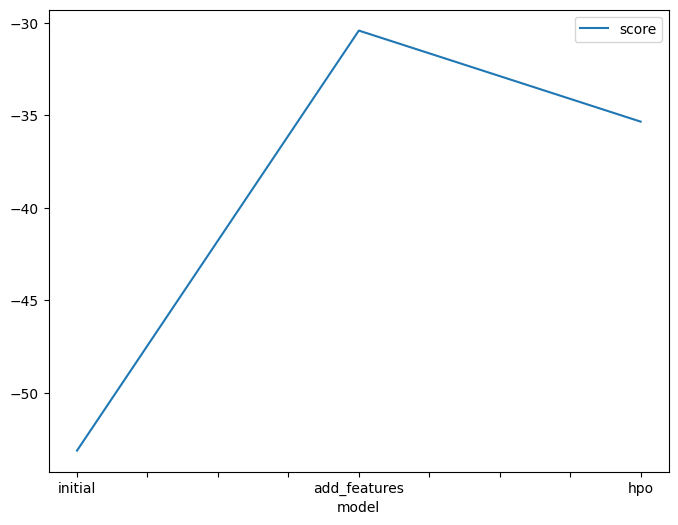

In [43]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-53.122595, -30.412034, -35.335276]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

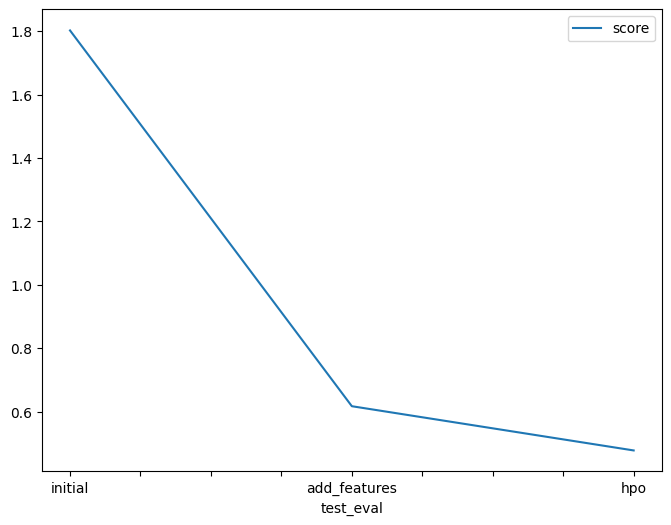

In [44]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.80293, 0.61673,  0.47712]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

In [45]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": ["default", "default", "num_boost_round"],
    "hpo2": ["default", "default", "learning_rate"],
    "hpo3": ["default", "default", "scheduler"],
    "score": [1.80293, 0.61673,  0.47712]
})

,model,hpo1,hpo2,hpo3,score
0,initial,default,default,default,1.80293
1,add_features,default,default,default,0.61673
2,hpo,num_boost_round,learning_rate,scheduler,0.47712
